In [ ]:
#import libraries
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
!pip install shap
import shap
import matplotlib.pyplot as plt

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
#Load dataset into pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/shubham13p/Ad-Click-Prediction/master/advertising.csv')
print(df.shape)
print(df.head())

(1000, 10)
   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04

In [ ]:
#Perform data cleaning and preprocessing
#Check for duplicated entries
print(df.info())
print('Duplicated enteries:', df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB
None
Duplicated enteries: 0


In [ ]:
#Perform data cleaning and preprocessing
#Remove Ad Topic Line as it is a phrase and not very relevant
#Change object types to categories
df = df.drop(columns=['Ad Topic Line'])
for column in df:
  if df[column].dtypes == 'object':
    df[column] = df[column].astype('category')
    df[column] = df[column].cat.codes

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   City                      1000 non-null   int16  
 5   Male                      1000 non-null   int64  
 6   Country                   1000 non-null   int16  
 7   Timestamp                 1000 non-null   int16  
 8   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int16(3), int64(3)
memory usage: 52.9 KB
None


In [ ]:
#Split the data into training and testing sets using an 80:20 ratio
x = df.drop(columns=['Clicked on Ad'])
y = df['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
#Scale the data using StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Build an ANN classification model
#Base model with random architecture assigned
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=X_train[0].shape),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

model.compile(loss='BinaryCrossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy', keras.metrics.Precision(),keras.metrics.Recall(),keras.metrics.AUC()])

history = model.fit(X_train, y_train, verbose=2)

25/25 - 2s - loss: 1.3198 - accuracy: 0.6963 - precision: 0.7875 - recall: 0.5539 - auc: 0.7664 - 2s/epoch - 74ms/step


In [ ]:
#Build an ANN classification model
#Experiment with different model architectures
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=X_train[0].shape),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])
model.compile(loss='BinaryCrossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy', keras.metrics.Precision(),keras.metrics.Recall(),keras.metrics.AUC()])
history = model.fit(X_train, y_train, verbose=2)

model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=X_train[0].shape),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])
model.compile(loss='BinaryCrossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy', keras.metrics.Precision(),keras.metrics.Recall(),keras.metrics.AUC()])
history = model.fit(X_train, y_train, verbose=2)

model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=X_train[0].shape),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])
model.compile(loss='BinaryCrossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy', keras.metrics.Precision(),keras.metrics.Recall(),keras.metrics.AUC()])
history = model.fit(X_train, y_train, verbose=2)

25/25 - 4s - loss: 7.8120 - accuracy: 0.4900 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - auc_1: 0.4920 - 4s/epoch - 157ms/step
25/25 - 3s - loss: 1.6882 - accuracy: 0.5788 - precision_2: 0.8737 - recall_2: 0.2034 - auc_2: 0.6456 - 3s/epoch - 121ms/step
25/25 - 3s - loss: 1.0146 - accuracy: 0.5562 - precision_3: 0.7054 - recall_3: 0.2230 - auc_3: 0.6032 - 3s/epoch - 138ms/step


In [ ]:
#Build an ANN classification model
#Experiment with different activation functions
model = keras.Sequential([
    keras.layers.Dense(100, activation='exponential', input_shape=X_train[0].shape),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(50, activation='exponential'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])
model.compile(loss='BinaryCrossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy', keras.metrics.Precision(),keras.metrics.Recall(),keras.metrics.AUC()])
history = model.fit(X_train, y_train, verbose=2)

model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=X_train[0].shape),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(50, activation='sigmoid'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])
model.compile(loss='BinaryCrossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy', keras.metrics.Precision(),keras.metrics.Recall(),keras.metrics.AUC()])
history = model.fit(X_train, y_train, verbose=2)

model = keras.Sequential([
    keras.layers.Dense(100, activation='linear', input_shape=X_train[0].shape),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(50, activation='linear'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])
model.compile(loss='BinaryCrossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy', keras.metrics.Precision(),keras.metrics.Recall(),keras.metrics.AUC()])
history = model.fit(X_train, y_train, verbose=2)

25/25 - 3s - loss: 3.8876 - accuracy: 0.7050 - precision_4: 0.7324 - recall_4: 0.6642 - auc_4: 0.7183 - 3s/epoch - 107ms/step
25/25 - 5s - loss: 1.9285 - accuracy: 0.5400 - precision_5: 0.5562 - recall_5: 0.4853 - auc_5: 0.5613 - 5s/epoch - 181ms/step
25/25 - 2s - loss: 2.0870 - accuracy: 0.7650 - precision_6: 0.8819 - recall_6: 0.6225 - auc_6: 0.8291 - 2s/epoch - 80ms/step


In [ ]:
#Build an ANN classification model
#Experiment with different regularization techniques
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=X_train[0].shape, kernel_regularizer='l1_l2'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(50, activation='relu', kernel_regularizer='l1_l2'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])
model.compile(loss='BinaryCrossentropy', optimizer=tf.keras.optimizers.Adafactor(learning_rate=0.01),
              metrics=['accuracy', keras.metrics.Precision(),keras.metrics.Recall(),keras.metrics.AUC()])
history = model.fit(X_train, y_train, verbose=2)

model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=X_train[0].shape, bias_regularizer='l1_l2'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(50, activation='relu', bias_regularizer='l1_l2'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])
model.compile(loss='BinaryCrossentropy', optimizer=tf.keras.optimizers.Adafactor(learning_rate=0.01),
              metrics=['accuracy', keras.metrics.Precision(),keras.metrics.Recall(),keras.metrics.AUC()])
history = model.fit(X_train, y_train, verbose=2)

model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=X_train[0].shape, activity_regularizer='l1_l2'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(50, activation='relu', activity_regularizer='l1_l2'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])
model.compile(loss='BinaryCrossentropy', optimizer=tf.keras.optimizers.Adafactor(learning_rate=0.01),
              metrics=['accuracy', keras.metrics.Precision(),keras.metrics.Recall(),keras.metrics.AUC()])
history = model.fit(X_train, y_train, verbose=2)

25/25 - 3s - loss: 7.6377 - accuracy: 0.7250 - precision_7: 0.8917 - recall_7: 0.5245 - auc_7: 0.8044 - 3s/epoch - 138ms/step
25/25 - 5s - loss: 1.3676 - accuracy: 0.7100 - precision_8: 0.9112 - recall_8: 0.4779 - auc_8: 0.8188 - 5s/epoch - 199ms/step
25/25 - 2s - loss: 2.7658 - accuracy: 0.6212 - precision_9: 0.9565 - recall_9: 0.2696 - auc_9: 0.7519 - 2s/epoch - 62ms/step


In [ ]:
#Build an ANN classification model
#Experiment with different learning rate
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=X_train[0].shape),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])
model.compile(loss='BinaryCrossentropy', optimizer=tf.keras.optimizers.Adafactor(learning_rate=0.01),
              metrics=['accuracy', keras.metrics.Precision(),keras.metrics.Recall(),keras.metrics.AUC()])
history = model.fit(X_train, y_train, verbose=2)

model.compile(loss='BinaryCrossentropy', optimizer=tf.keras.optimizers.Adafactor(learning_rate=0.1),
              metrics=['accuracy', keras.metrics.Precision(),keras.metrics.Recall(),keras.metrics.AUC()])
history = model.fit(X_train, y_train, verbose=2)

model.compile(loss='BinaryCrossentropy', optimizer=tf.keras.optimizers.Adafactor(learning_rate=1),
              metrics=['accuracy', keras.metrics.Precision(),keras.metrics.Recall(),keras.metrics.AUC()])
history = model.fit(X_train, y_train, verbose=2)

25/25 - 2s - loss: 1.3142 - accuracy: 0.6913 - precision_15: 0.9045 - recall_15: 0.4412 - auc_15: 0.7745 - 2s/epoch - 77ms/step
25/25 - 2s - loss: 0.5571 - accuracy: 0.9350 - precision_16: 0.9363 - recall_16: 0.9363 - auc_16: 0.9611 - 2s/epoch - 67ms/step
25/25 - 1s - loss: nan - accuracy: 0.5088 - precision_17: 0.9412 - recall_17: 0.0392 - auc_17: 0.0015 - 1s/epoch - 55ms/step


In [ ]:
#Build an ANN classification model
#Experiment with different batch sizes
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=X_train[0].shape),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])
model.compile(loss='BinaryCrossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy', keras.metrics.Precision(),keras.metrics.Recall(),keras.metrics.AUC()])
history = model.fit(X_train, y_train,batch_size=1, verbose=2)
history = model.fit(X_train, y_train,batch_size=5, verbose=2)
history = model.fit(X_train, y_train,batch_size=10, verbose=2)
history = model.fit(X_train, y_train,batch_size=25, verbose=2)
history = model.fit(X_train, y_train,batch_size=50, verbose=2)
history = model.fit(X_train, y_train,batch_size=100, verbose=2)

800/800 - 2s - loss: 0.9768 - accuracy: 0.8737 - precision_13: 0.9501 - recall_13: 0.7941 - auc_13: 0.9234 - 2s/epoch - 3ms/step
160/160 - 1s - loss: 0.2606 - accuracy: 0.9613 - precision_13: 0.9821 - recall_13: 0.9412 - auc_13: 0.9843 - 1s/epoch - 8ms/step
80/80 - 0s - loss: 0.2899 - accuracy: 0.9700 - precision_13: 0.9776 - recall_13: 0.9632 - auc_13: 0.9813 - 223ms/epoch - 3ms/step
32/32 - 0s - loss: 0.2355 - accuracy: 0.9650 - precision_13: 0.9657 - recall_13: 0.9657 - auc_13: 0.9854 - 104ms/epoch - 3ms/step
16/16 - 0s - loss: 0.2342 - accuracy: 0.9712 - precision_13: 0.9849 - recall_13: 0.9583 - auc_13: 0.9857 - 57ms/epoch - 4ms/step
8/8 - 0s - loss: 0.2384 - accuracy: 0.9688 - precision_13: 0.9799 - recall_13: 0.9583 - auc_13: 0.9856 - 45ms/epoch - 6ms/step


In [ ]:
#Create a final model using parameter trends and evaluate on training data
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=X_train[0].shape, kernel_regularizer='l1_l2'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(50, activation='relu', kernel_regularizer='l1_l2'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])
model.compile(loss='BinaryCrossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy', keras.metrics.Precision(),keras.metrics.Recall(),keras.metrics.AUC()])
history = model.fit(X_train, y_train, batch_size=10, verbose=2)

80/80 - 2s - loss: 2.4288 - accuracy: 0.9150 - precision_14: 0.9315 - recall_14: 0.8995 - auc_14: 0.9633 - 2s/epoch - 19ms/step


In [ ]:
#Final model evaluation on test set
test = model.evaluate(X_test, y_test, verbose=2)

7/7 - 0s - loss: 0.6697 - accuracy: 0.9700 - precision_14: 1.0000 - recall_14: 0.9348 - auc_14: 0.9950 - 428ms/epoch - 61ms/step


  0%|          | 0/200 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


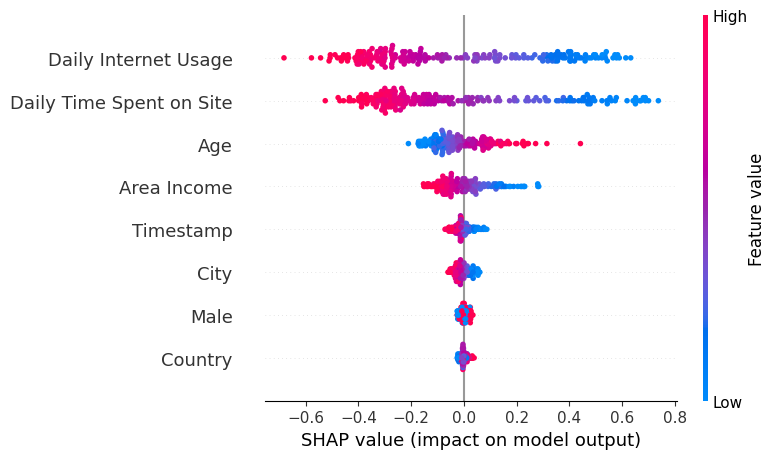

In [ ]:
#Use SHAP to determine the most important features from the model
e = shap.KernelExplainer(model, X_train)
shap_values = e.shap_values(X_test)

features = ['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage',
              'City','Male','Country','Timestamp']
shap.initjs()
shap.force_plot(e.expected_value[0], shap_values[0][0], features = features)
shap.summary_plot(shap_values[0], X_test, feature_names=features)

In [ ]:
#Build a basic gradient boositng classifier and evaluate to compare with ANN
gbc = GradientBoostingClassifier(learning_rate=1.0, max_depth=3, random_state=0)
gbc = gbc.fit(X_train, y_train)

pred_train = gbc.predict(X_train)
pred_test = gbc.predict(X_test)

print("Test Accuracy:", round(metrics.accuracy_score(y_test, pred_test),5))
print("Recall Score:", round(metrics.recall_score(pred_test, y_test, average="weighted"),5))
print("Precision Score:", round(metrics.precision_score(pred_test, y_test, average="weighted"),5))
print("AUC Score:", round(metrics.roc_auc_score(pred_test, y_test, average="weighted"),5))

Test Accuracy: 0.96
Recall Score: 0.96
Precision Score: 0.96093
AUC Score: 0.96185


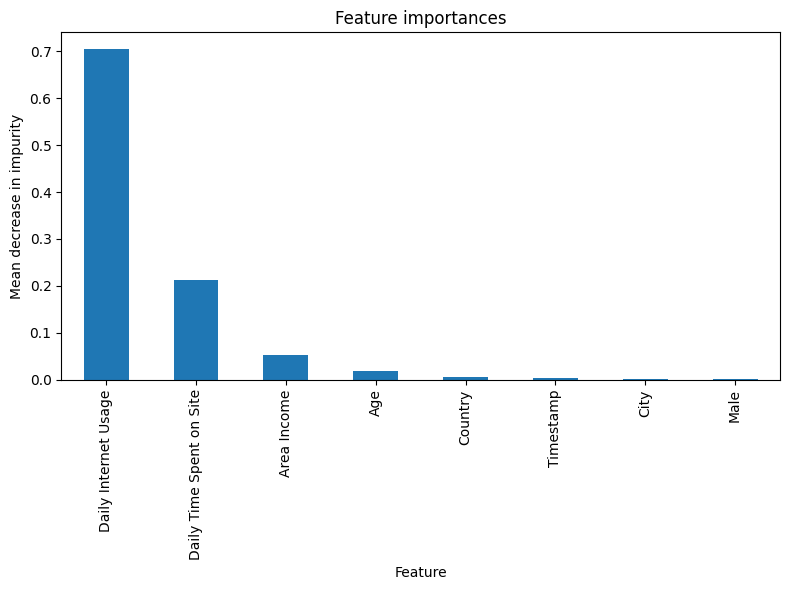

In [ ]:
#Find the feature importance using the GBT and compare to ANN
features = pd.Series(gbc.feature_importances_, index=x.columns)
features.sort_values(ascending=False, inplace=True)
plt.rcParams['figure.dpi'] = 100
fig, ax = plt.subplots(figsize=(8,6))
features.head(10).plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
ax.set_xlabel("Feature")
fig.tight_layout()
plt.show()